In [3]:
import requests
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 데이터 불러오기&전처리

In [4]:
#punctuation지우기
import string
import re
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('', '', text)
    return text
remove_punct("wow!!!")

'wow'

### 소비자 물가 지수(consumer_price)

In [5]:
consumer_price = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/소비자물가지수.csv", encoding='ansi')
consumer_price['year'] = consumer_price["시도별"].str.extract("(\d{4}).", expand=True)
consumer_price['month'] = consumer_price["시도별"].str.extract(". (\d{2})", expand=True)
del consumer_price['시도별']
consumer_price = consumer_price.rename(columns = {'전국':'물가'})
consumer_price = consumer_price.astype(int)
consumer_price.head(3)

,물가,year,month
0,89,2010,1
1,90,2010,2
2,90,2010,3


### 가격(day_price)

In [6]:
colname=['year','day','price']
df_2010 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/가격/df_2010.csv", names=colname)
df_2011 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/가격/df_2011.csv", names=colname)
df_2012 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/가격/df_2012.csv", names=colname)
df_2013 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/가격/df_2013.csv", names=colname)
df_2014 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/가격/df_2014.csv", names=colname)
df_2015 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/가격/df_2015.csv", names=colname)
df_2016 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/가격/df_2016.csv", names=colname)
df_2017 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/가격/df_2017.csv", names=colname)
df_2018 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/가격/df_2018.csv", names=colname)
df_2019 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/가격/df_2019.csv", names=colname)
df_2020 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/가격/df_2020.csv", names=colname)

In [7]:
day_price = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020])

In [8]:
#year, month, day로 나누기
day_price = day_price.astype(str)
day_price['month'] = day_price.day.str.extract("(\d{2})/", expand=True)
day_price['day'] = day_price.day.str.extract("/(\d{2})", expand=True)
day_price['year'] =day_price['year'].astype(str)
day_price['date'] = day_price['year']+day_price['month']+day_price['day']

#punctuation 삭제
day_price['price'] = day_price['price'].apply(lambda x: remove_punct(x))

day_price = day_price[['year','month','day','date','price']]
day_price = day_price.astype(int)
day_price.head(3)

,year,month,day,date,price
0,2010,1,4,20100104,1278
1,2010,1,5,20100105,1293
2,2010,1,6,20100106,1293


In [9]:
day_price.isna().sum()

year     0
month    0
day      0
date     0
price    0
dtype: int64

### 날씨(temp)

In [10]:
df_2010 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2010.csv", encoding='ansi')
df_2011 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2011.csv", encoding='ansi')
df_2012 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2012.csv", encoding='ansi')
df_2013 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2013.csv", encoding='ansi')
df_2014 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2014.csv", encoding='ansi')
df_2015 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2015.csv", encoding='ansi')
df_2016 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2016.csv", encoding='ansi')
df_2017 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2017.csv", encoding='ansi') 
df_2018 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2018.csv", encoding='ansi') 
df_2019 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2019.csv", encoding='ansi') 
df_2020 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/[final]과일 데이터/기상data/df_2020.csv", encoding='ansi')

In [11]:
df = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020])

In [12]:
jindo = df[df['지점명']=='진도(첨찰산)'].reset_index()
del jindo['index']

In [13]:
mokpo = df[df['지점명']=='목포'].reset_index()
del mokpo['index']

In [14]:
temp = pd.merge(jindo['일시'], mokpo)

In [15]:
jindo.isna().sum()

지점                  0
지점명                 0
일시                  0
평균기온(°C)            8
최저기온(°C)            0
최고기온(°C)            0
일강수량(mm)         2190
최대 순간 풍속(m/s)       4
최대 풍속(m/s)          4
평균 풍속(m/s)          7
평균 상대습도(%)         28
합계 일조시간(hr)         2
합계 일사량(MJ/m2)    3505
평균 전운량(1/10)     1538
dtype: int64

In [16]:
#진도 na값 목포값으로 대체
jindo['평균기온(°C)'] = np.where(pd.notnull(jindo['평균기온(°C)']) == True, jindo['평균기온(°C)'], temp['평균기온(°C)'])
jindo['일강수량(mm)'] = np.where(pd.notnull(jindo['일강수량(mm)']) == True, jindo['일강수량(mm)'], temp['일강수량(mm)'])
jindo['평균 상대습도(%)'] = np.where(pd.notnull(jindo['평균 상대습도(%)']) == True, jindo['평균 상대습도(%)'], temp['평균 상대습도(%)'])
jindo['합계 일조시간(hr)'] = np.where(pd.notnull(jindo['합계 일조시간(hr)']) == True, jindo['합계 일조시간(hr)'], temp['합계 일조시간(hr)'])
jindo['합계 일사량(MJ/m2)'] = np.where(pd.notnull(jindo['합계 일사량(MJ/m2)']) == True, jindo['합계 일사량(MJ/m2)'], temp['합계 일사량(MJ/m2)'])
jindo['평균 전운량(1/10)'] = np.where(pd.notnull(jindo['평균 전운량(1/10)']) == True, jindo['평균 전운량(1/10)'], temp['평균 전운량(1/10)'])

#### 기상청에서는 0.1단위로 강수량을 측정해서 0.1이하로 비가 내리면 0으로 표시되기 때문에 0을 0.01, 결측 값을 0으로 변환했습니다.

In [17]:
jindo = jindo.replace({'일강수량(mm)':0}=={'일강수량(mm)':0.01})

In [18]:
jindo['일강수량(mm)'] = jindo['일강수량(mm)'].fillna(0)

In [19]:
temp = jindo.dropna()

### 공급량(supply_data)

In [20]:
df_2010 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/공급/df_2010.csv", encoding='utf-8')
df_2011 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/공급/df_2011.csv", encoding='utf-8')
df_2012 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/공급/df_2012.csv", encoding='utf-8')
df_2013 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/공급/df_2013.csv", encoding='utf-8')
df_2014 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/공급/df_2014.csv", encoding='utf-8')
df_2015 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/공급/df_2015.csv", encoding='utf-8')
df_2016 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/공급/df_2016.csv", encoding='utf-8')
df_2017 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/공급/df_2017.csv", encoding='utf-8')
df_2018 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/공급/df_2018.csv", encoding='utf-8')
df_2019 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/공급/df_2019.csv", encoding='utf-8')
df_2020 = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/공급/df_2020.csv", encoding='utf-8')

In [21]:
supply_data = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020])

### 생산량(output_data)

In [22]:
output_data = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/생산량.csv", encoding='ansi')


In [23]:
output_data = output_data.rename(index = output_data["시도별"])
del output_data["시도별"]

In [24]:
#생산량은 t단위로 저장되어있기 때문에 kg으로 변환
output_data = output_data*1000

### 수출수입량(export_data)

In [25]:
colname=['year','month','수출(중량)','수출(금액)','수입(중량)','수입(금액)']
export_data = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/수입수출.csv", encoding='ansi', names=colname)


### 유통비용(distribution_data)

In [26]:
distribution_data = pd.read_csv("D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/유통비용.csv")

In [27]:
distribution_data = distribution_data[distribution_data['year']>2009]

# 데이터 EDA

### 생산량 가장 많은 연도와 지역

In [28]:
use_data = output_data.copy()

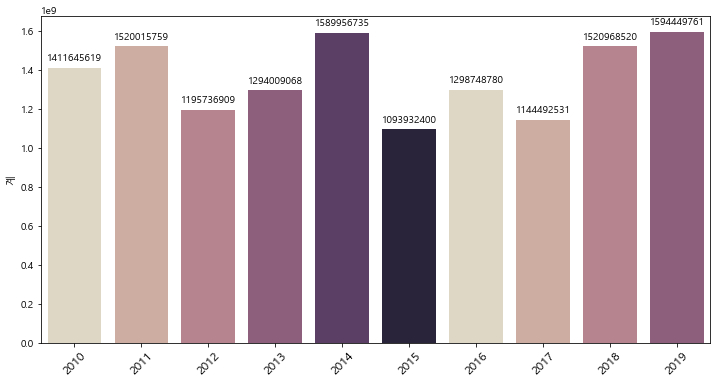

In [29]:
#barchart_data = use_data.sum(axis=1).sort_values(ascending = False)
#barchart_data = pd.DataFrame(barchart_data, columns = ["sum"])
#barchart_data = barchart_data.astype(int)

plt.figure(figsize=(12,6))
palette = sns.color_palette("ch:s=-.2,r=.6")

g = sns.barplot(data=use_data, x=use_data.index, y="계", palette=palette)
ax = g
#annotate axis = seaborn axis 
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 
plt.xticks(fontsize=12, rotation=45)
plt.show()

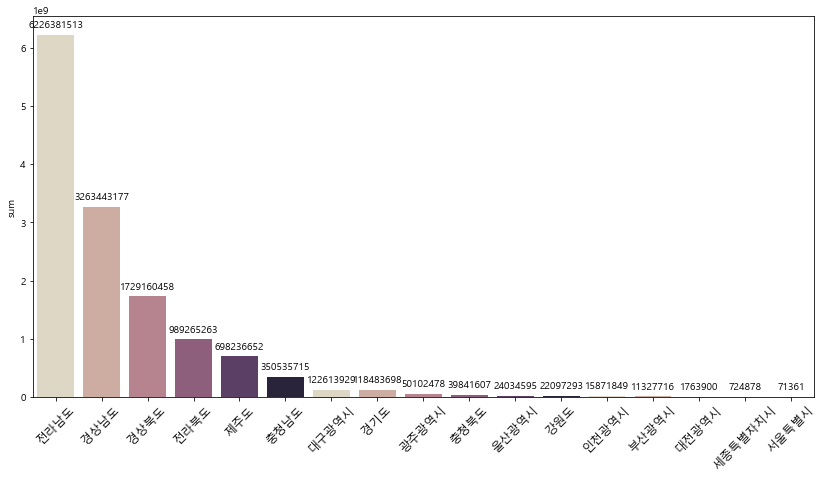

In [30]:
barchart_data = use_data.sum(axis=0).sort_values(ascending = False)
barchart_data = pd.DataFrame(barchart_data, columns = ["sum"])

plt.figure(figsize=(14,7))
palette = sns.color_palette("ch:s=-.2,r=.6")

g = sns.barplot(data=barchart_data[1:], x=barchart_data[1:].index, y="sum", palette=palette)
ax = g
#annotate axis = seaborn axis 
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 
plt.xticks(fontsize=12, rotation=45)
plt.show()

### 평균 유통 가격

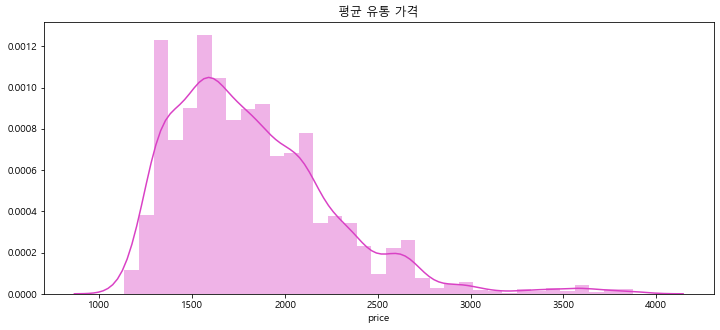

In [73]:
plt.figure(figsize=(12,5))
plt.title("평균 유통 가격")
ax = sns.distplot(day_price["price"], color = '#D941C5')

### 날씨와 생산량의 상관관계

In [31]:
use_temp = temp.copy()

use_temp['일시'] = use_temp['일시']+','
use_temp['year'] = use_temp["일시"].str.extract("(\d{4})-", expand=True)
use_temp['month'] = use_temp["일시"].str.extract("-(\d{2})-", expand=True)
use_temp['day'] = use_temp["일시"].str.extract("-(\d{2}),", expand=True)
use_temp['date'] = use_temp['year']+use_temp['month']+use_temp['day']

use_temp['date'] = use_temp['date'].astype(str)

del use_temp["지점명"]
del use_temp["지점"]
use_temp = use_temp.groupby(['year','month'], as_index=False).mean()

#생산량 데이터
use_output = output_data.copy()
use_output['year'] = use_output.index
use_output = use_output.iloc[:,-3:]
del use_output['제주도']

#int 타입으로
use_output = use_output.astype(int)
use_temp = use_temp.astype(int)

#합치기
temp_output = pd.merge(use_temp, use_output, how = 'left', on = 'year')
temp_output = temp_output.rename(columns = {'price':'avgPrice'})
temp_output = temp_output.rename(columns = {'경상남도':'생산량'})

In [32]:
temp_output.isna().sum()

year             0
month            0
평균기온(°C)         0
최저기온(°C)         0
최고기온(°C)         0
일강수량(mm)         0
최대 순간 풍속(m/s)    0
최대 풍속(m/s)       0
평균 풍속(m/s)       0
평균 상대습도(%)       0
합계 일조시간(hr)      0
합계 일사량(MJ/m2)    0
평균 전운량(1/10)     0
생산량              0
dtype: int64

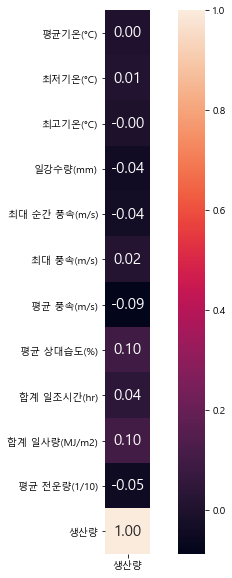

In [33]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

cols = ['평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)','생산량']
cm = pd.DataFrame(temp_output.iloc[:,2:].corr(method = 'pearson')['생산량'])
plt.figure(figsize=(10,10))
#sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

#### 8,9,10,3,4,5월-가뭄 고온

In [35]:
temp_output_hot = temp_output[temp_output['month'].isin(['08','09','10','03','04','05'])]
heat_data = pd.DataFrame(temp_output_hot.iloc[:,2:].corr(method = 'pearson')['생산량'])

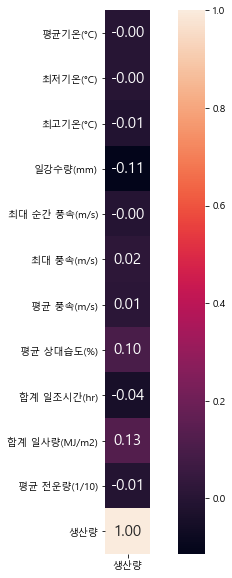

In [36]:
cols = ['평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)','생산량']
plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

#### 2,6,7월 - 장마

In [37]:
temp_output_rain = temp_output[temp_output['month'].isin(['02','06','07'])]
heat_data = pd.DataFrame(temp_output_rain.iloc[:,2:].corr(method = 'pearson')['생산량'])

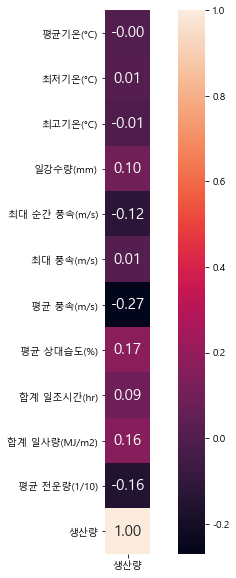

In [38]:
cols = ['평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)','생산량']
plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

#### 11,12,1월 - 저온, 서리

In [40]:
temp_output_snow = temp_output[temp_output['month'].isin(['11','12','01'])]
heat_data = pd.DataFrame(temp_output_snow.iloc[:,2:].corr(method = 'pearson')['생산량'])

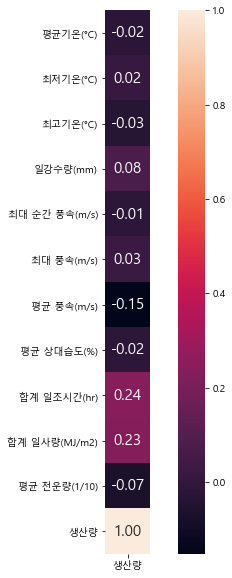

In [41]:
cols = ['평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)','생산량']
plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 당해 년 생산량과 가격

In [45]:
use_data['year'] = use_data.index
use_data = use_data.astype(int)
day_price = day_price.astype(int)

In [63]:
line_data = pd.merge(use_data[['year','계']], day_price)
line_data = line_data[line_data['month'].isin(['07','08','09'])]

In [64]:
line_data = line_data.groupby('year').mean()

In [65]:
del line_data['month']
del line_data['day']
del line_data['date']

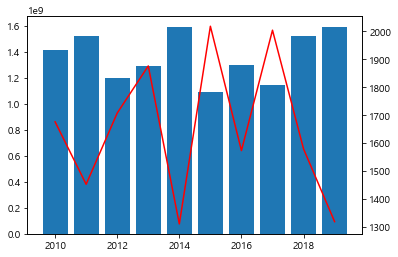

In [66]:
plt.bar(line_data.index,line_data['계'])
plt.twinx()  
plt.plot(line_data.index,line_data['price'], color='red')

plt.show()

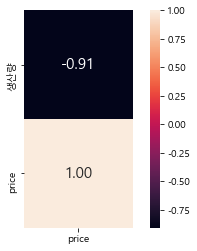

In [67]:
heat_data = pd.DataFrame(line_data.corr(method = 'pearson')['price'])
cols = ['생산량', 'price']
#plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 전년도 생산량과 가격

In [68]:
previous_data = output_data.copy()

previous_data = previous_data[['계']]
previous_data['year'] = previous_data.index

#전년도 생산량을 year로
#진짜 생산연도는 real_year
previous_data['real_year'] = previous_data['year']
previous_data['year'] = previous_data['year']+1

previous_data = previous_data.astype(int)

In [69]:
cor_data = pd.merge(previous_data, day_price)
cor_data = cor_data[cor_data['month'].isin(['03','04','05'])]

In [70]:
cor_data = cor_data.groupby('year').mean()
cor_data = cor_data[['계','price']]

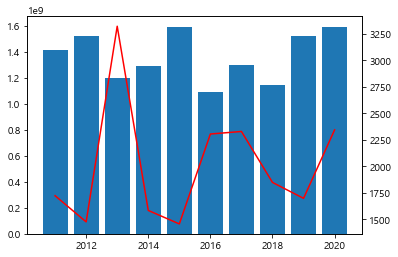

In [71]:
plt.bar(cor_data.index,cor_data['계'])
plt.twinx()  
plt.plot(cor_data.index,cor_data['price'], color='red')

plt.show()

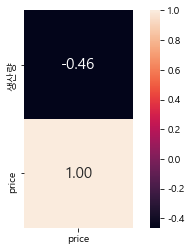

In [72]:
heat_data = pd.DataFrame(cor_data.corr(method = 'pearson')['price'])
cols = ['생산량','price']
#plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 소비자물가와 가격의 상관관계

In [74]:
price_df = pd.merge(day_price, consumer_price)
price_df = price_df[['price','물가']]
price_df.corr(method = 'pearson')

,price,물가
price,1.0000,0.0709
물가,0.0709,1.0000


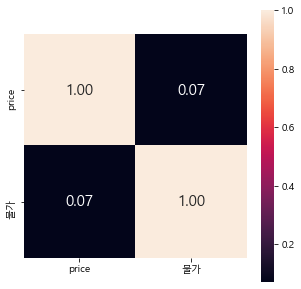

In [75]:
cols = ['price','물가']
cm = pd.DataFrame(price_df.corr(method = 'pearson'))
plt.figure(figsize=(5,5))
#sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 유통비용과 가격의 상관관계

In [104]:
distribution_data = distribution_data[distribution_data['year']>2009]
distribution_data = distribution_data.astype(int)

In [106]:
cor_data = pd.merge(distribution_data, day_price)
cor_data = cor_data.groupby(cor_data['year']).mean()

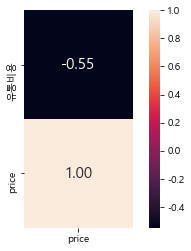

In [109]:
heat_data = pd.DataFrame(cor_data[['유통비용','price']].corr(method = 'pearson')['price'])
cols = ['유통비용', 'price']
#plt.figure(figsize=(10,10))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

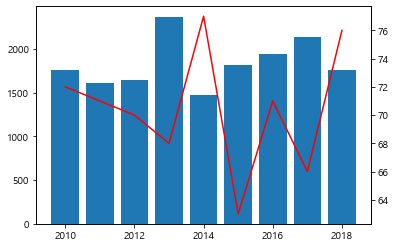

In [110]:
plt.bar(cor_data.index,cor_data['price'])
plt.twinx()  
plt.plot(cor_data.index,cor_data['유통비용'], color='red')

plt.show()

### 수출수입, 가격의 상관관계

In [76]:
use_export = export_data.copy()
use_export[use_export['month']=='합']

,year,month,수출(중량),수출(금액),수입(중량),수입(금액)
0,2010,합,3829172,2229606,21334085,11180200
13,2011,합,777198,295255,18330617,10701261
26,2012,합,962210,563807,45952057,24639537
39,2013,합,722701,378664,65243477,39686685
52,2014,합,24272312,7300550,8553208,6263854
65,2015,합,385838,210180,154369316,63335508
78,2016,합,8909288,4806260,55350308,26110445
91,2017,합,546662,329049,159341841,53774332
104,2018,합,3461571,1066169,70345664,25621509
117,2019,합,50419905,16668484,35058465,15147084


In [77]:
#수출수입 데이터 year, month
use_export = export_data.copy()
use_export = use_export.drop(export_data.index[0], axis=0)
use_export = use_export.drop(export_data.index[13], axis=0)
use_export = use_export.drop(export_data.index[26], axis=0)
use_export = use_export.drop(export_data.index[39], axis=0)
use_export = use_export.drop(export_data.index[52], axis=0)
use_export = use_export.drop(export_data.index[65], axis=0)
use_export = use_export.drop(export_data.index[78], axis=0)
use_export = use_export.drop(export_data.index[91], axis=0)
use_export = use_export.drop(export_data.index[104], axis=0)
use_export = use_export.drop(export_data.index[117], axis=0)
use_export = use_export.drop(export_data.index[130], axis=0)

#가격 데이터 year, month, day
use_price = day_price.copy()
#use_price = use_price.groupby(by = ["year", "month"], as_index=False).mean()
use_export = use_export.astype(int)
use_price = use_price.astype(int)

export_cor_data = pd.merge(use_price, use_export ,how='left')

In [78]:
export_cor_data.isna().sum()

year       0
month      0
day        0
date       0
price      0
수출(중량)    11
수출(금액)    11
수입(중량)    11
수입(금액)    11
dtype: int64

In [79]:
export_cor_data = export_cor_data.dropna()

In [80]:
export_cor_data = export_cor_data[['수출(중량)','수출(금액)','수입(중량)','수입(금액)','price']]

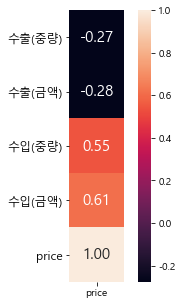

In [81]:
cols = ['수출(중량)','수출(금액)','수입(중량)','수입(금액)','price']
heat_data = pd.DataFrame(export_cor_data.corr(method = 'pearson')['price'])
plt.figure(figsize=(5,5))
plt.yticks(fontsize=12, rotation=45)
#sns.set(font_scale = 1.7)
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 공급량과 가격

In [82]:
#공급량 데이터 date-day
use_supply = supply_data.copy()
use_supply = use_supply.rename(columns = {'거래년월일':'date'})
use_supply['date'] = pd.to_datetime(use_supply["date"], format='%Y%m%d')
use_supply['date'] = use_supply['date'].astype(str)
use_supply['date'] = use_supply['date']+','
use_supply['year'] = use_supply["date"].str.extract("(\d{4})-", expand=True)
use_supply['month'] = use_supply["date"].str.extract("-(\d{2})-", expand=True)
use_supply['day'] = use_supply["date"].str.extract("-(\d{2}),", expand=True)
use_supply['date'] = use_supply['year']+use_supply['month']+use_supply['day']
use_supply['거래량'] = use_supply['거래량'].astype(str)
use_supply['거래량'] = use_supply['거래량'].apply(lambda x: remove_punct(x))
del use_supply['품목명']
use_supply = use_supply.astype(int)
use_supply = use_supply.groupby(by = ["year", "month", "day","date"], as_index=False).sum()
use_supply = use_supply.astype(int)

supply_cor_data = pd.merge(use_price, use_supply ,how='left')

In [83]:
supply_cor_data = supply_cor_data.dropna()

In [84]:
supply_cor_data = supply_cor_data[['price','거래량']]

In [85]:
heat_data = pd.DataFrame(supply_cor_data.corr(method = 'pearson')['price'])

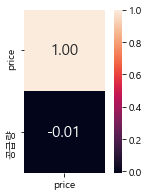

In [86]:
cols = ['price','공급량']
plt.figure(figsize=(3,3))
hm = sns.heatmap(heat_data,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

### 날씨와 가격의 상관관계

In [87]:
use_temp = temp.copy()

use_temp['일시'] = use_temp['일시']+','
use_temp['year'] = use_temp["일시"].str.extract("(\d{4})-", expand=True)
use_temp['month'] = use_temp["일시"].str.extract("-(\d{2})-", expand=True)
use_temp['day'] = use_temp["일시"].str.extract("-(\d{2}),", expand=True)
use_temp['date'] = use_temp['year']+use_temp['month']+use_temp['day']
del use_temp['year']
del use_temp['month']
del use_temp['day']

use_temp['date'] = use_temp['date'].astype(int)

#합치기
temp_price = pd.merge(day_price, use_temp, how = 'left', on = 'date')
temp_price = temp_price.rename(columns = {'price':'avgPrice'})

In [88]:
temp_price.isna().sum()

year               0
month              0
day                0
date               0
avgPrice           0
지점               320
지점명              320
일시               320
평균기온(°C)         320
최저기온(°C)         320
최고기온(°C)         320
일강수량(mm)         320
최대 순간 풍속(m/s)    320
최대 풍속(m/s)       320
평균 풍속(m/s)       320
평균 상대습도(%)       320
합계 일조시간(hr)      320
합계 일사량(MJ/m2)    320
평균 전운량(1/10)     320
dtype: int64

In [89]:
temp_price = temp_price.dropna()

In [90]:
temp_price = temp_price.drop(['date'], axis=1)

del temp_price['일시']
del temp_price['지점명']
del temp_price['지점']

temp_price = temp_price.astype(int)

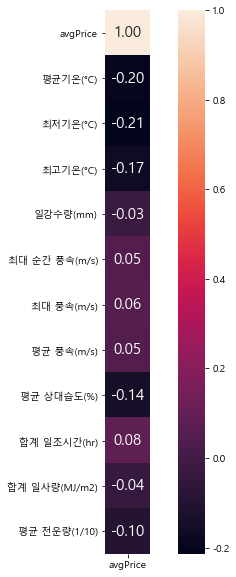

In [91]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

cols = ['avgPrice','평균기온(°C)','최저기온(°C)','최고기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최대 풍속(m/s)','평균 풍속(m/s)','평균 상대습도(%)','합계 일조시간(hr)','합계 일사량(MJ/m2)','평균 전운량(1/10)']
cm = pd.DataFrame(temp_price.iloc[:,3:].corr(method = 'pearson')['avgPrice'])
plt.figure(figsize=(10,10))
#sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols)

# Prophet

In [92]:
use_price = day_price.copy()
use_price.head(3)

,year,month,day,date,price
0,2010,1,4,20100104,1278
1,2010,1,5,20100105,1293
2,2010,1,6,20100106,1293


In [93]:
use_price['date'] = pd.to_datetime(use_price['date'], format='%Y%m%d')

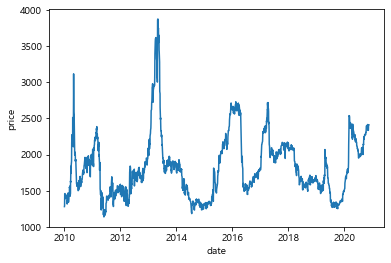

In [94]:
sns.lineplot(data = use_price, x='date', y='price')

In [95]:
use_price = use_price[['date', 'price']].reset_index(drop=True)

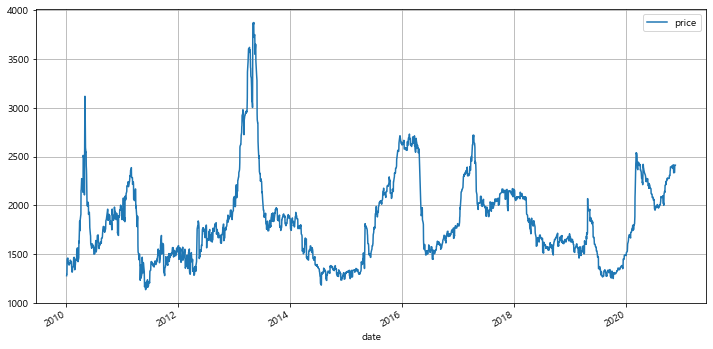

In [96]:
use_price.plot(x='date', y='price', kind="line", figsize=(12,6), grid=True)

In [97]:
use_price = use_price.rename(columns={'date':'ds', 'price':'y'})

In [98]:
m = Prophet()
m.fit(use_price)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [99]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [100]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3037,2021-11-12,2388.272478,1652.907158,3111.152119,1716.521986,3128.110518,-31.896196,-31.896196,-31.896196,36.159688,36.159688,36.159688,-68.055884,-68.055884,-68.055884,0.0,0.0,0.0,2356.376281
3038,2021-11-13,2389.094272,1442.420205,2973.886574,1713.072605,3131.840296,-176.175491,-176.175491,-176.175491,-107.943786,-107.943786,-107.943786,-68.231705,-68.231705,-68.231705,0.0,0.0,0.0,2212.918780
3039,2021-11-14,2389.916066,1442.581164,2983.470390,1710.872209,3135.364371,-176.659764,-176.659764,-176.659764,-107.943782,-107.943782,-107.943782,-68.715982,-68.715982,-68.715982,0.0,0.0,0.0,2213.256302
3040,2021-11-15,2390.737860,1610.893470,3110.717695,1709.218898,3138.888446,-21.922088,-21.922088,-21.922088,47.551901,47.551901,47.551901,-69.473989,-69.473989,-69.473989,0.0,0.0,0.0,2368.815772
3041,2021-11-16,2391.559654,1605.342364,3110.891920,1707.565587,3140.116013,-26.035002,-26.035002,-26.035002,44.426641,44.426641,44.426641,-70.461644,-70.461644,-70.461644,0.0,0.0,0.0,2365.524651


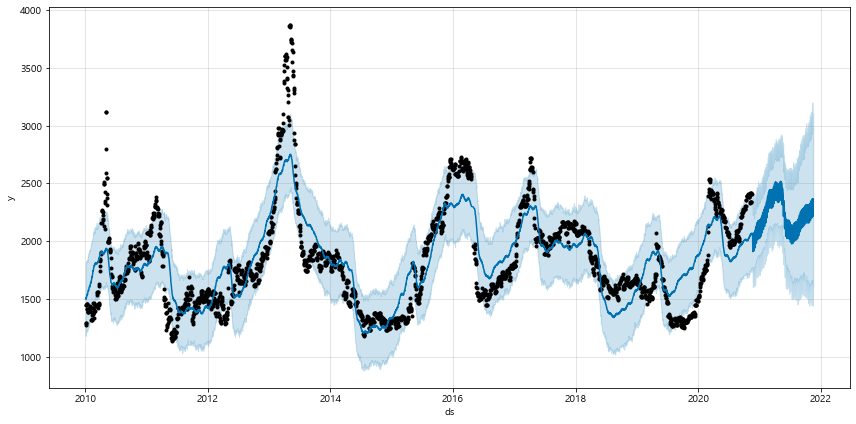

In [101]:
fig1 = m.plot(forecast, figsize=(12,6))

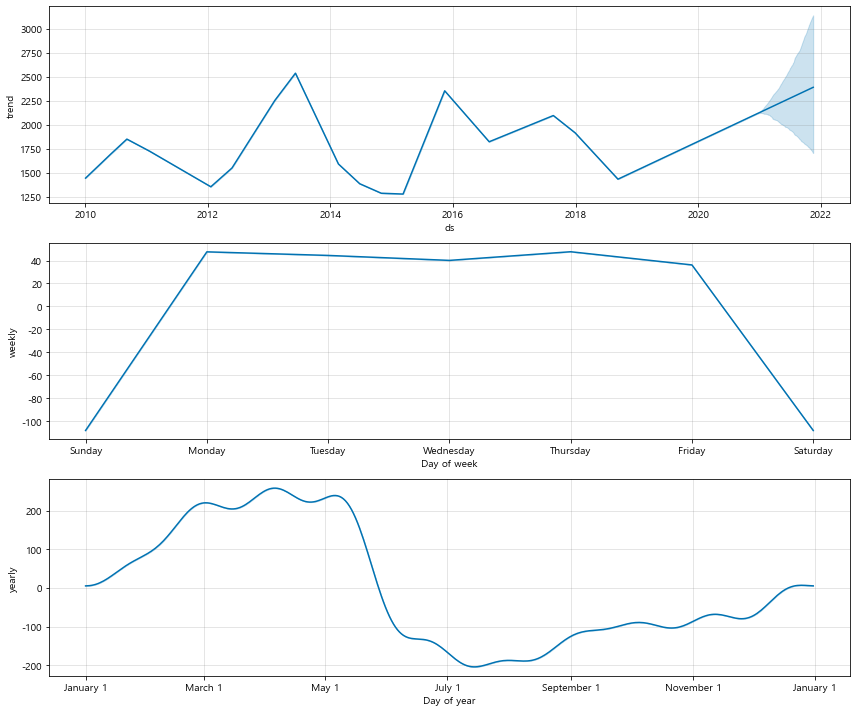

In [102]:
fig2 = m.plot_components(forecast, figsize=(12,10))

# save csv

#### lstm분석에 이용할 데이터 저장

In [98]:
use_export = use_export.astype(int)
save_data = pd.merge(day_price, use_export, how='left')

In [103]:
output_data['year'] = output_data.index

In [104]:
save_data = pd.merge(save_data, distribution_data, how='left')
save_data = pd.merge(save_data, output_data[['계','year']], how='left')

In [105]:
del save_data['year']
del save_data['month']
del save_data['day']

In [106]:
save_data.isna().sum()

date        0
price       0
수출(중량)     11
수출(금액)     11
수입(중량)     11
수입(금액)     11
유통비용      463
계         217
dtype: int64

In [107]:
save_data = save_data.dropna()

In [108]:
save_data = save_data.rename(columns = {'계':'생산량'})
save_data = save_data[['date','수출(중량)','수출(금액)','수입(중량)','수입(금액)','유통비용','생산량','price']]

In [109]:
save_data.to_csv('D:/학교/4학년/1학기/캡스톤디자인/농산물 유통정보/양파/data.csv', index=True)